# Problem Statement

Title : Predictive analytics for Customer and Product Segmentation in the Retail Industry Using Machine Learning

Datasource Collection : https://www.kaggle.com/datasets/naveenkumar20bps1137/sample-superstore/data


The dataset consist of  :   9994  rows and    21   columns

_______________________________________________________________________________________________________________________________________________

In [4]:
import numpy as np

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('raw.csv',encoding="unicode_escape")


Error Faced : "UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 2961: invalid start byte"  

Solution : https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [1239]:
df.shape

(9994, 21)

# 1. Data Inspection

- Check Missing Value
- Check duplicates
- Check Datatypes
- Check Stats of Data
- Check Additional info

1.1 Check Missing values

In [1240]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

No missing Values found.

1.2 Check Duplicates

In [1241]:
df.duplicated().sum()

np.int64(0)

No duplicates Found

1.3 Check Datatypes

In [1242]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

It is seen that most of the columns are categorical, even Order Date and Ship Date are categorical.

Now, we will try to use pyjanitor in our code. It is just a python implementation of R package. It is used to clean dataset, however they use chaining method. 

Now there are three ways to use the pyjanitor library in our code.
1. use pyjanitor's functions as if they were native to pandas
4. The second is the functional API.
4. the pipe() method


We will mostly use the first method, as its documentation recommends to use the first one : https://pyjanitor-devs.github.io/pyjanitor/

https://github.com/pyjanitor-devs/pyjanitor

In [1243]:
import janitor
df = pd.DataFrame.from_dict(df).clean_names().remove_empty()

From the pyjanitor library, we have used the clean_names() function. This function cleans the names of the columns. Like removing whitespaces within column name and lower casing all the column names.


Now, just an headsup. The functions like clean_names can run individually. However, it's about providing a cleaner, method-chaining cleaning technique.

In [1244]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [1245]:
df.dtypes

row_id             int64
order_id          object
order_date        object
ship_date         object
ship_mode         object
customer_id       object
customer_name     object
segment           object
country           object
city              object
state             object
postal_code        int64
region            object
product_id        object
category          object
sub_category      object
product_name      object
sales            float64
quantity           int64
discount         float64
profit           float64
dtype: object

In [1246]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [1247]:
df.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object

Dropping column row_id, as it has no relevance with segmentation !!

In [1248]:
df = df.drop('row_id',axis=1)

In [1249]:
# here we are just removing order_date, ship_date and Postal_code from the list, to avoid getting their stats.
numerical_columns = [col for col in df.columns if col not in ['order_date', 'ship_date','postal_code']]
df_describe = df[numerical_columns].describe()
print(df_describe)


              sales     quantity     discount       profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000


In [1250]:
col = df.columns
cat_Col= []
num_Col = []
for i in col:
    if df[i].dtypes == object:
        cat_Col.append(i)
    else:
     num_Col.append(i)

In [1251]:
cat_Col

['order_id',
 'ship_mode',
 'customer_id',
 'customer_name',
 'segment',
 'country',
 'city',
 'state',
 'region',
 'product_id',
 'category',
 'sub_category',
 'product_name']

In [1252]:
num_Col

['order_date',
 'ship_date',
 'postal_code',
 'sales',
 'quantity',
 'discount',
 'profit']

In [1253]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [1254]:
s = df['category'].unique()
s

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [1255]:
df.shape

(9994, 20)

In [1256]:
df.describe()

,order_date,ship_date,postal_code,sales,quantity,discount,profit
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


_________________________________________________________________________________________________________________________________________________

# 2. Data visualization

So 'sales','quantity','discount','profit' these are the numerical cols, we are going to plot histogram for identification of the data distribution

Plotting graphs used : https://seaborn.pydata.org/generated/seaborn.histplot.html

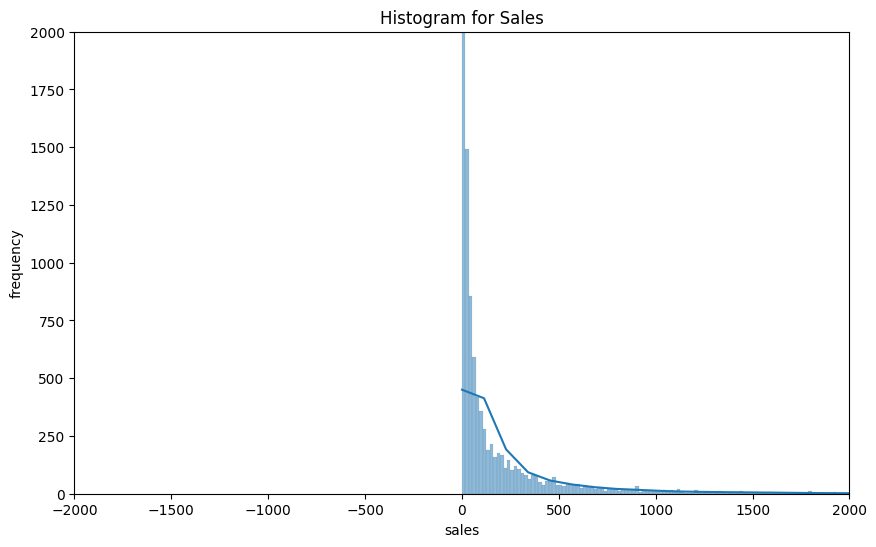

In [1257]:
# The Frequency distribution for sales columns is Right skewwed
plt.figure(figsize=(10,6))
sns.histplot(df['sales'],kde=True)
plt.title('Histogram for Sales')
plt.xlabel('sales')
plt.ylabel('frequency')
plt.ylim(0, 2000)
plt.xlim(-2000, 2000)
plt.show()


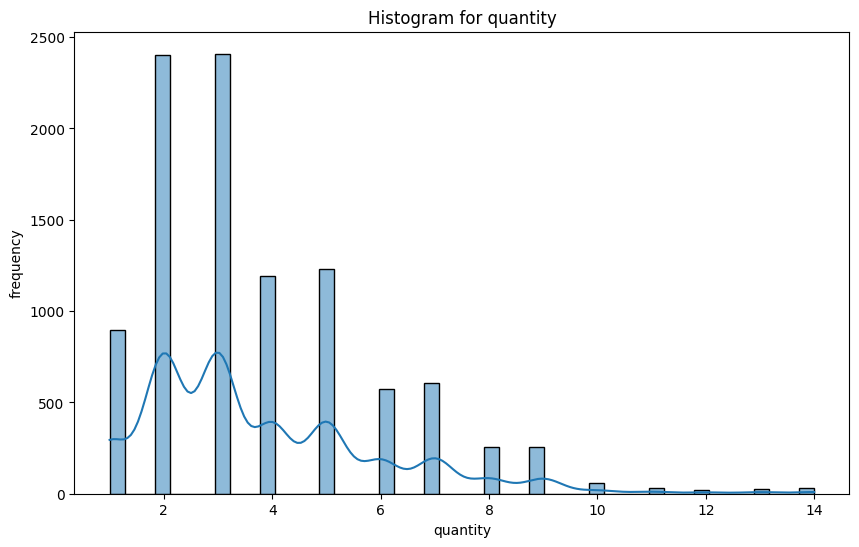

In [1258]:
# The Frequency distribution for quantity column has no pattern
plt.figure(figsize=(10,6))
sns.histplot(df['quantity'],kde=True)
plt.title('Histogram for quantity')
plt.xlabel('quantity')
plt.ylabel('frequency')
#plt.ylim(0, 2000)
#plt.xlim(0, 5000)
plt.show()


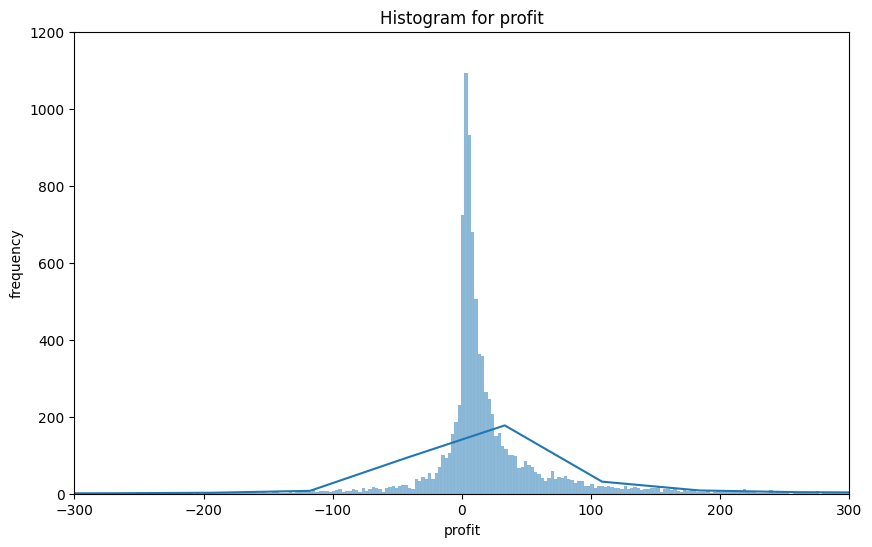

In [1259]:
# The Frequency distribution for profit column has somewhat symmetric pattern
plt.figure(figsize=(10,6))
sns.histplot(df['profit'],kde=True)
plt.title('Histogram for profit')
plt.xlabel('profit')
plt.ylabel('frequency')
plt.ylim(0, 1200)
plt.xlim(-300, 300)
plt.show()

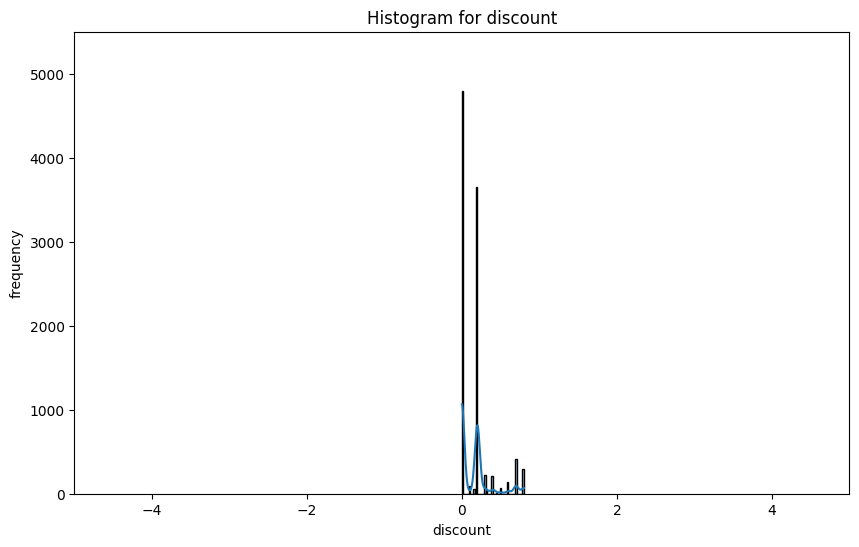

In [1260]:
# The Frequency distribution for discount column has right skewwed distribution
plt.figure(figsize=(10,6))
sns.histplot(df['discount'],kde=True)
plt.title('Histogram for discount')
plt.xlabel('discount')
plt.ylabel('frequency')
plt.ylim(0, 5500)
plt.xlim(-5, 5)
plt.show()

The insights achieved from above graphs, help us undertand that there are many outliers in our dataset. And hence we cannot consider K-means algorithm for our clustering technique.

Outlier removal is a tricky question in it self, however it totally depends on the problem you are trying to solve, https://stats.stackexchange.com/questions/164436/outliers-detection-for-clustering-methods

In [1261]:
df.describe()

,order_date,ship_date,postal_code,sales,quantity,discount,profit
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [1262]:
df.shape

(9994, 20)

In [1263]:
data_with_outlier = df.copy()

___________

# 3.Outlier Detection

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

In [1264]:
col = df.columns
num_df = pd.DataFrame()
cats_Col= []
nums_Col = []
for i in col:
    if df[i].dtypes == object:
        cats_Col.append(i)
    else:
     nums_Col.append(i)
num_df = df[nums_Col]
cat_df = df[cats_Col]   

num_df = num_df.drop(columns=['order_date','ship_date','postal_code'],axis=1)

In [1265]:
from sklearn.ensemble import IsolationForest

def Outlier_removal(df,num_df):
    #contamination is the proportion of outliers in the data set, it usually ranges from 0 to 0.5
    clf = IsolationForest(contamination=0.01,random_state=42)
    clf.fit(num_df)
    df['outlier_score'] = clf.predict(num_df)

    # masking the rows that are not outliers
    df_with_outliers = df[df['outlier_score']!=1]
    df = df[df['outlier_score']==1]
    df = df.drop(columns=['outlier_score'])

    return df

df = Outlier_removal(df,num_df)


In [1266]:
df.shape

(9894, 20)

In [1267]:
data_ = df.copy()

__________

# 4. Exploratory Data Analysis


Our problem statement mentioned about the supermarket store focusing on improving its Electronics department, so lets try to get some insights into the in-store data.

EDA is necessary, to get better understanding of data and remove not so useful data in cleaning itself(self-preffered).


Some of the questions we can solve using data analysis are :

In [1268]:
#filtering out only electronic data for analysis
electronics_df = df[df['category']=='Technology']

In [1269]:
# Importing warnings library because when we plot graphs we dont want any warnings to be displayed along with it.
import warnings
warnings.filterwarnings("ignore")

4.1 Which segment drives more profit to the store ?

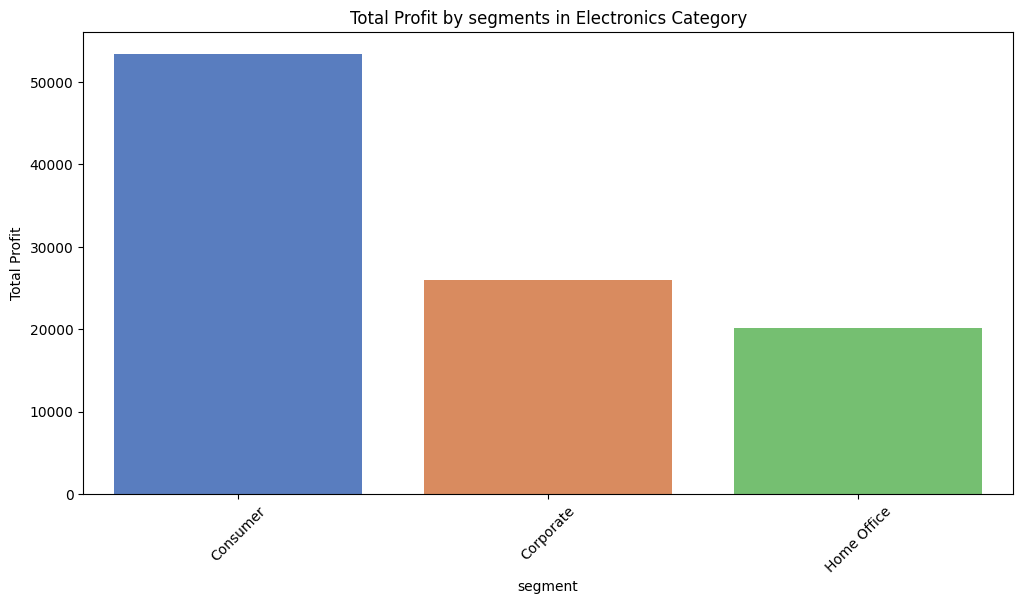

In [1270]:
plt.figure(figsize=(12, 6))
sns.barplot(x='segment', y='profit', data=electronics_df, estimator=sum, ci=None, palette='muted')
plt.title('Total Profit by segments in Electronics Category')
plt.xlabel('segment')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

From the above two graphs, we were able to identify the most profit deriving electronic device and segment as well. 

Therefore, the target now is to understand why are segments like Home-Office and Corporate generating less income and what is the issue with Machines sub category not being profitable ?

4.2 Which segment has been offered the most amount of discount ?

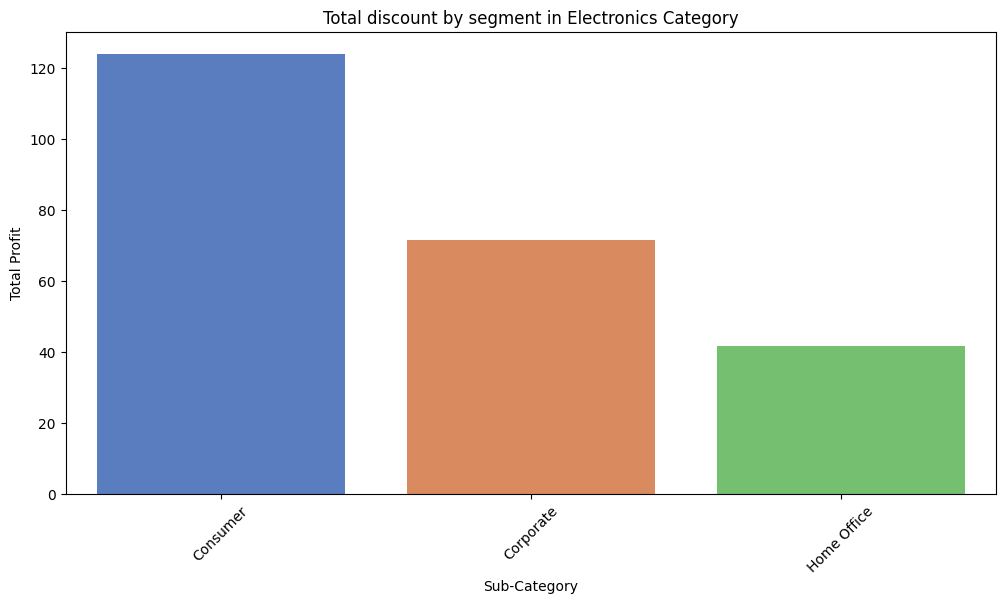

In [1271]:
plt.figure(figsize=(12, 6))
sns.barplot(x='segment', y='discount', data=electronics_df, estimator=sum, ci=None, palette='muted')
plt.title('Total discount by segment in Electronics Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

Therefore, it can be seen that the consumer segement of the supermarket store is performing well. However, the store needs to identify the issues with related to corporate and Home office segments.

4.3 What is the most valuable sub category within technology/electronics sector ?

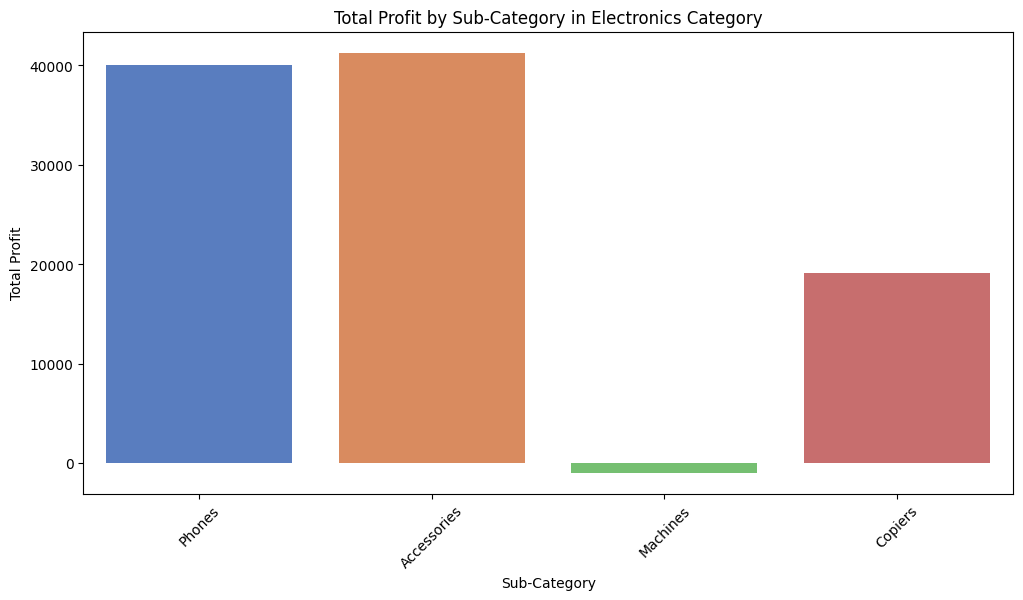

In [1272]:
plt.figure(figsize=(12, 6))
sns.barplot(x='sub_category', y='profit', data=electronics_df, estimator=sum, ci=None, palette='muted')
plt.title('Total Profit by Sub-Category in Electronics Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

4.4 What sub_category has the most sales ?

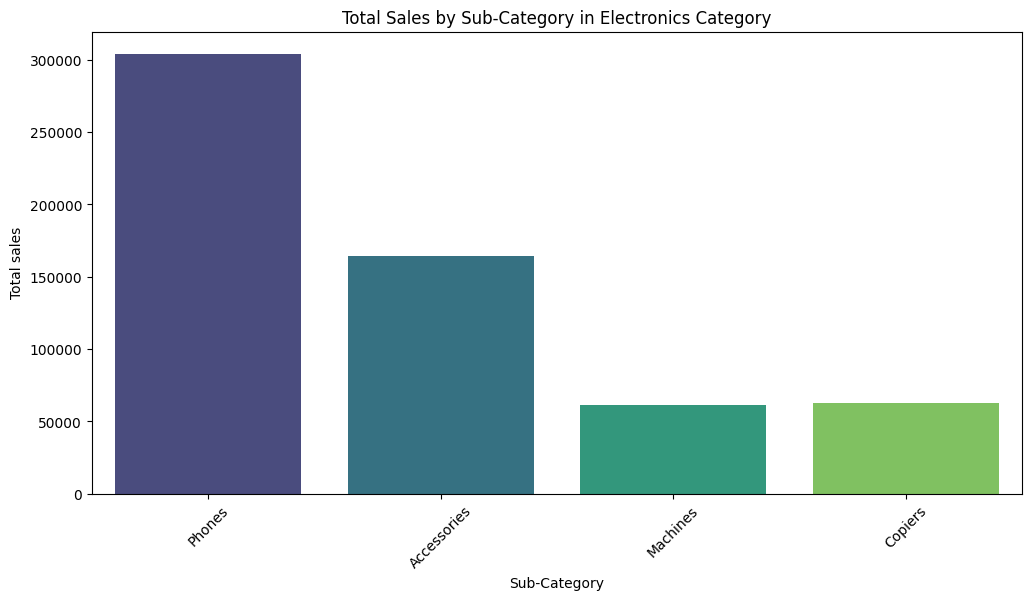

In [1273]:
plt.figure(figsize=(12, 6))
sns.barplot(x='sub_category', y='sales', data=electronics_df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Sales by Sub-Category in Electronics Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total sales')
plt.xticks(rotation=45)
plt.show()

Insights from the sub_category graphs : we can say,
1. the sales of phones and profit are directly proportional.
4. Even though sales of Accessories are less, it returns are good.
4. Machines are having the highest sales, however the derive less profit.
4. On the contrary, the profit generated by copiers are much greater than their sales.



Now, lets focus on the machines and dive a bit deeper into the Machines sub_category.

4.5 Which are the machines which are frequently bought ?

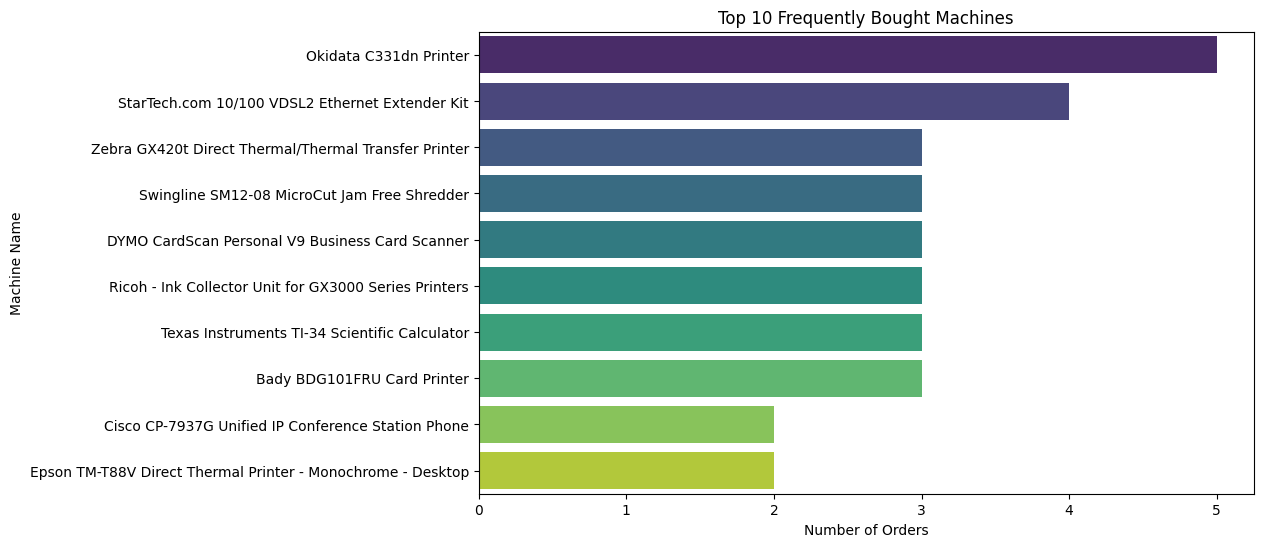

In [1274]:
#inorder to identify the top machines we need to make our dataset more concise.

df_machines = df[(df['category']=='Technology') & (df['sub_category']=='Machines')]
freq_machines = df_machines['product_name'].value_counts().head(10)
df_machines

plt.figure(figsize=(10, 6))
sns.barplot(x=freq_machines.values, y=freq_machines.index, palette='viridis')
plt.title('Top 10 Frequently Bought Machines')
plt.xlabel('Number of Orders')
plt.ylabel('Machine Name')
plt.show()


4.6  Analyze product names and their quantities ordered by month?

In [1275]:
electronics_df.dtypes

order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object

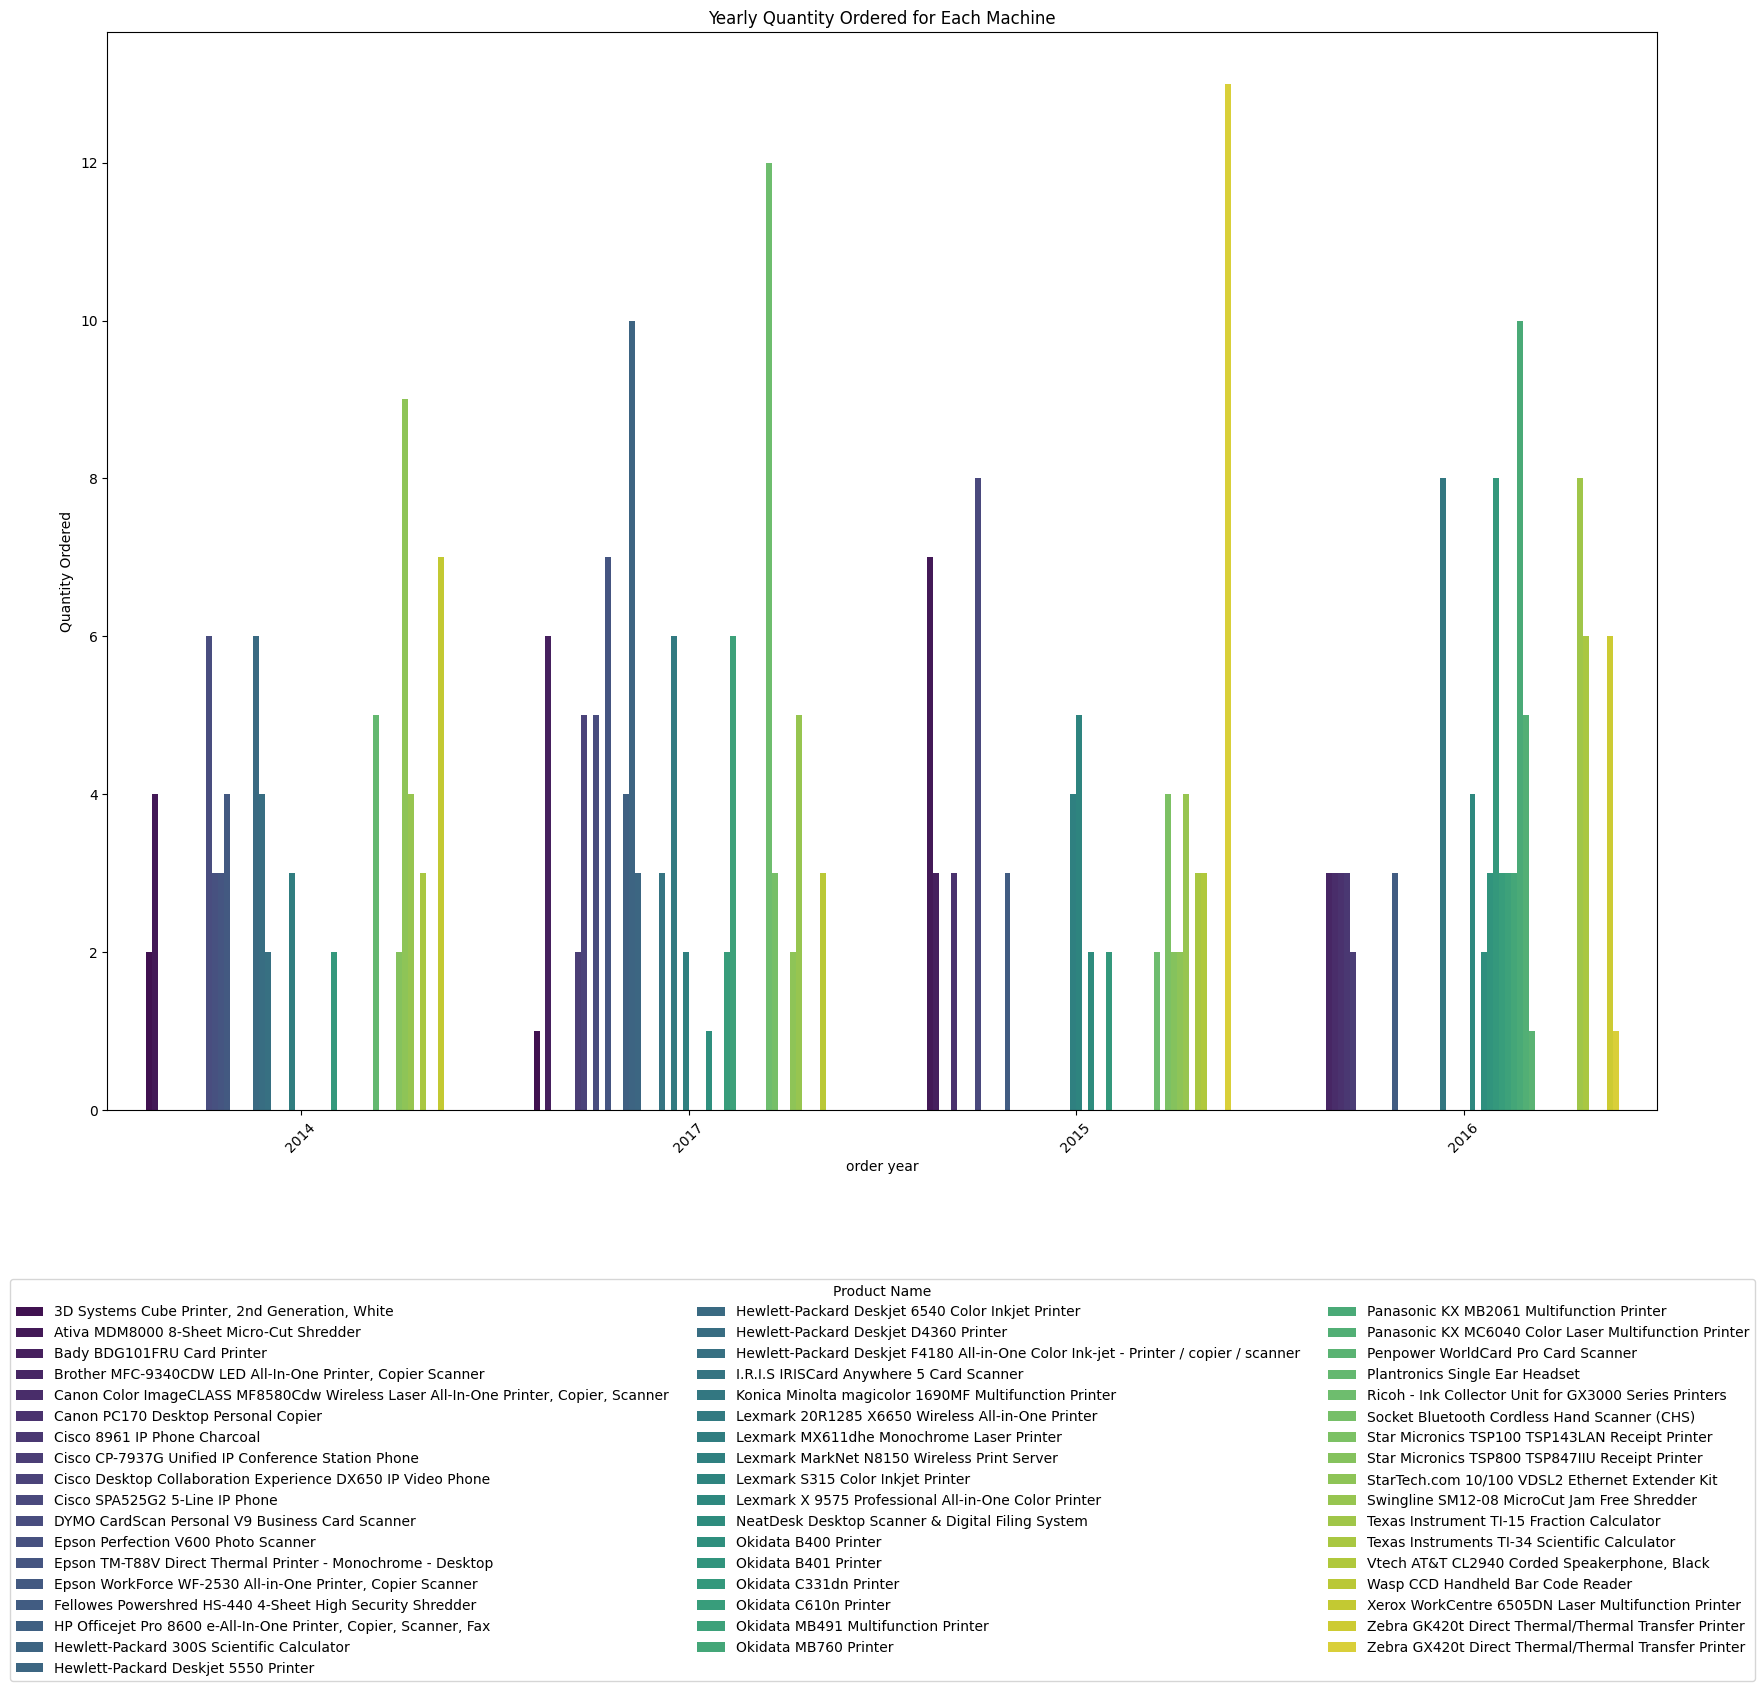

In [1276]:

df_machines = df[(df['category']=='Technology') & (df['sub_category']=='Machines')]

df_machines['order_year'] = df_machines['order_date'].dt.to_period('Y')

month_quant = df_machines.groupby(['product_name','order_year'])['quantity'].sum().reset_index()

plt.figure(figsize=(20, 14))
sns.barplot(x='order_year', y='quantity', hue='product_name', data=month_quant, palette='viridis')
plt.title('Yearly Quantity Ordered for Each Machine')
plt.xlabel('order year')
plt.ylabel('Quantity Ordered')
plt.legend(title='Product Name', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)
plt.xticks(rotation=45)
plt.show()

This graphs depicts all the best sold and unsold machines in the year 2014,2015,2016,2017. 

4.7  which are top customer in the machines category ?

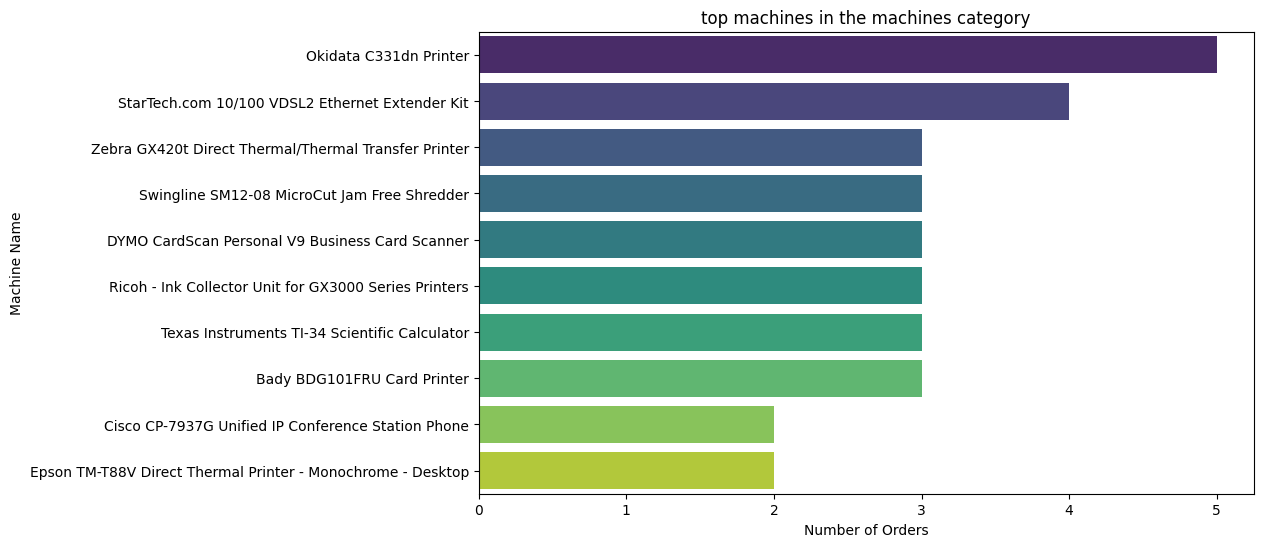

In [1277]:
#inorder to identify the top machines we need to make our dataset more concise.

df_machines = df[(df['category']=='Technology') & (df['sub_category']=='Machines')]
top_cust = df_machines['customer_name'].value_counts().head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x=freq_machines.values, y=freq_machines.index, palette='viridis')
plt.title('top machines in the machines category')
plt.xlabel('Number of Orders')
plt.ylabel('Machine Name')
plt.show()


The below list of customer names, which can be used to tailor marketing strategies.

In [1278]:
top_cust

customer_name
Sean Braxton           4
Pamela Stobb           3
Natalie Webber         2
Brian Thompson         2
Mick Hernandez         2
Aaron Smayling         2
Chloris Kastensmidt    2
Clay Ludtke            2
Frank Atkinson         2
Jennifer Braxton       1
Name: count, dtype: int64

The below code helps us to understand the discount provided to each of the top customers, Likewise the discount could be calculated for lowest customers.

In [1279]:
df_top_cust = df_machines[df_machines['customer_name'].isin(top_cust.index)]
discount_Offered = df_top_cust.groupby('customer_name')['discount'].sum().reset_index()
discount_Offered

,customer_name,discount
0,Aaron Smayling,0.9
1,Brian Thompson,0.4
2,Chloris Kastensmidt,0.9
3,Clay Ludtke,0.4
4,Frank Atkinson,0.9
5,Jennifer Braxton,0.5
6,Mick Hernandez,0.1
7,Natalie Webber,1.4
8,Pamela Stobb,1.8
9,Sean Braxton,2.2


_____________________________________________________________________________________________________________________________________

# 5.RFM Analysis

We perform RFM analysis to gain insights and overview of our existing customer  base. 

Recency: How recently has the customer made a transaction with us

Frequency: How frequent is the customer in ordering/buying some product from us

Monetary: How much does the customer spend on purchasing products from us.

In [1280]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Below is the code of recency analysis for customer_name and product_category.

In [1281]:
df_cust_recency = df.groupby(by='customer_name',as_index=False)['order_date'].max()
df_prod_recency = df.groupby(by='sub_category',as_index=False)['ship_date'].max()

df_cust_recency.columns = ['customer_name','LatestPurchaseDate']
df_prod_recency.columns = ['sub_category','LatestShipDate']

recent_cust_date = df_cust_recency['LatestPurchaseDate'].max()
recent_prod_date = df_prod_recency['LatestShipDate'].max()

df_cust_recency['Recency'] = df_cust_recency['LatestPurchaseDate'].apply(lambda x:(recent_cust_date -x).days) # code of lambda reffered from GFG
df_prod_recency['Recency'] = df_prod_recency['LatestShipDate'].apply(lambda x:(recent_prod_date -x).days) 


In [1282]:
df_cust_recency

,customer_name,LatestPurchaseDate,Recency
0,Aaron Bergman,2016-11-10,415
1,Aaron Hawkins,2017-12-18,12
2,Aaron Smayling,2017-10-03,88
3,Adam Bellavance,2017-11-06,54
4,Adam Hart,2017-11-26,34
...,...,...,...
788,Xylona Preis,2017-11-17,43
789,Yana Sorensen,2017-12-21,9
790,Yoseph Carroll,2017-12-26,4
791,Zuschuss Carroll,2017-11-06,54


In [1283]:
df_prod_recency

,sub_category,LatestShipDate,Recency
0,Accessories,2017-12-30,6
1,Appliances,2018-01-05,0
2,Art,2018-01-02,3
3,Binders,2018-01-04,1
4,Bookcases,2018-01-03,2
5,Chairs,2018-01-02,3
6,Copiers,2017-12-25,11
7,Envelopes,2017-12-28,8
8,Fasteners,2018-01-04,1
9,Furnishings,2018-01-05,0


Next, we dive into frequency analysis of both customer and product base for the supermarket store.

In [1284]:
df_cust_freq  = df.drop_duplicates().groupby(by='customer_name',as_index=False)['order_date'].count()
df_prod_freq  = df.drop_duplicates().groupby(by='sub_category',as_index=False)['order_date'].count()

df_cust_freq.columns = ['customer_name','Frequency']
df_prod_freq.columns = ['sub_category','Frequency']


In [1285]:
df_cust_freq

,customer_name,Frequency
0,Aaron Bergman,6
1,Aaron Hawkins,11
2,Aaron Smayling,10
3,Adam Bellavance,17
4,Adam Hart,20
...,...,...
788,Xylona Preis,28
789,Yana Sorensen,11
790,Yoseph Carroll,7
791,Zuschuss Carroll,30


In [1286]:
df_prod_freq

,sub_category,Frequency
0,Accessories,774
1,Appliances,460
2,Art,796
3,Binders,1495
4,Bookcases,225
5,Chairs,608
6,Copiers,56
7,Envelopes,254
8,Fasteners,217
9,Furnishings,957


Lastly, we derive the monetary aspect of customer and product base. 

In [1287]:
df['total_revenue'] = df['sales']*df['quantity']
df_cust_mon = df.groupby(by='customer_name', as_index=False)['total_revenue'].sum()
df_cust_mon.columns = ['customer_name', 'Monetary'] 
df_prod_mon = df.groupby(by='sub_category',as_index=False)['profit'].sum()
df_prod_mon.columns=['sub_category','Monetary']

In [1288]:
df_cust_mon

,customer_name,Monetary
0,Aaron Bergman,1984.480
1,Aaron Hawkins,11459.552
2,Aaron Smayling,9088.880
3,Adam Bellavance,17969.908
4,Adam Hart,9664.265
...,...,...
788,Xylona Preis,8676.214
789,Yana Sorensen,21337.240
790,Yoseph Carroll,6668.616
791,Zuschuss Carroll,35857.721


In [1289]:
df_prod_mon

,sub_category,Monetary
0,Accessories,41300.6354
1,Appliances,16113.7788
2,Art,6527.7870
3,Binders,20903.2492
4,Bookcases,-2770.5328
5,Chairs,22745.7330
6,Copiers,19157.5882
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


Merging RFM dataframe of customer and product seprately !

In [1290]:
#Customers RFM analysis
df_cust_rf = df_cust_recency.merge(df_cust_freq,on='customer_name')
df_cust_rfm = df_cust_rf.merge(df_cust_mon,on='customer_name').drop(
    columns='LatestPurchaseDate')
df_cust_rfm.head()


,customer_name,Recency,Frequency,Monetary
0,Aaron Bergman,415,6,1984.480
1,Aaron Hawkins,12,11,11459.552
2,Aaron Smayling,88,10,9088.880
3,Adam Bellavance,54,17,17969.908
4,Adam Hart,34,20,9664.265


In [1291]:
df_cust_rfm['R_rank'] = df_cust_rfm['Recency'].rank(ascending=False)
df_cust_rfm['F_rank'] = df_cust_rfm['Recency'].rank(ascending=False)
df_cust_rfm['M_rank'] = df_cust_rfm['Recency'].rank(ascending=False)

#normalizing rank, reffered from GFG
df_cust_rfm['R_rank_norm'] =(df_cust_rfm['R_rank']/df_cust_rfm['R_rank'].max())*100
df_cust_rfm['F_rank_norm'] =(df_cust_rfm['F_rank']/df_cust_rfm['F_rank'].max())*100
df_cust_rfm['M_rank_norm'] =(df_cust_rfm['M_rank']/df_cust_rfm['M_rank'].max())*100

df_cust_rfm.drop(columns=['R_rank','F_rank','M_rank'],inplace=True)
df_cust_rfm.head()


,customer_name,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,Aaron Bergman,415,6,1984.480,9.033481,9.033481,9.033481
1,Aaron Hawkins,12,11,11459.552,90.524321,90.524321,90.524321
2,Aaron Smayling,88,10,9088.880,46.367656,46.367656,46.367656
3,Adam Bellavance,54,17,17969.908,59.696778,59.696778,59.696778
4,Adam Hart,34,20,9664.265,73.025900,73.025900,73.025900


In [1292]:
import sqlite3
import os

def save_to_sqlite(df_name, table_name):
  try:
    path = "C:\\FinalYearProject\\code\\code\\data\\clustered_data\\"
    db_file = path + 'dashboard_database.db'  
    os.makedirs(path, exist_ok=True)  

    # Checking if the database file exists
    if not os.path.exists(db_file):
      conn = sqlite3.connect(db_file)
      cursor = conn.cursor()
      cursor.execute("PRAGMA foreign_keys = ON")  # Enabling foreign key constraints
      conn.commit()
    else:
      conn = sqlite3.connect(db_file)

    df_name.to_sql(table_name, conn, index=False, if_exists='replace')
    conn.commit()
    return conn
  except Exception as e:
    print(f"Error saving Df to sqlite:{e}")
  finally:
    if conn:
      conn.close()

table_name = 'RFM_Scores'
save_to_sqlite(df_cust_rfm, table_name)


Now, we will rate all the customers on the scale of 1 to 5. 

We do so using below formula : rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score

In [1293]:
df_cust_rfm['RFM_cust_Score'] = 0.15*df_cust_rfm['R_rank_norm']+0.28*df_cust_rfm['F_rank_norm']+0.57*df_cust_rfm['M_rank_norm']
df_cust_rfm['RFM_cust_Score'] *=0.05
df_cust_rfm =df_cust_rfm.round(2)
df_cust_rfm[['customer_name','RFM_cust_Score']].head()

,customer_name,RFM_cust_Score
0,Aaron Bergman,0.45
1,Aaron Hawkins,4.53
2,Aaron Smayling,2.32
3,Adam Bellavance,2.98
4,Adam Hart,3.65


Rating Customer based upon the RFM score

rfm score >4.5 : Top Customer

4.5 > rfm score > 4 : High Value Customer

4>rfm score >3 : Medium value customer

3>rfm score>1.6 : Low-value customer

rfm score<1.6 :Lost Customer

In [1294]:
df_cust_rfm['Customer_segment'] = np.where(
    df_cust_rfm['RFM_cust_Score'] > 4.5, "Top Customers",
    np.where(
        df_cust_rfm['RFM_cust_Score'] > 4, "High Value Customer",
        np.where(
            df_cust_rfm['RFM_cust_Score'] > 3, "Medium Value Customer",
            np.where(
                df_cust_rfm['RFM_cust_Score'] > 1.6, "Low Value Customers",
                "Lost Customers"
            )
        )
    )
)

df_cust_rfm[['customer_name', 'RFM_cust_Score', 'Customer_segment']].head()


,customer_name,RFM_cust_Score,Customer_segment
0,Aaron Bergman,0.45,Lost Customers
1,Aaron Hawkins,4.53,Top Customers
2,Aaron Smayling,2.32,Low Value Customers
3,Adam Bellavance,2.98,Low Value Customers
4,Adam Hart,3.65,Medium Value Customer


In [1295]:

table_name = 'RFM_Customer_segments'
save_to_sqlite(df_cust_rfm, table_name)

The customer RFM analysis code is reffered from GFG : https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/

However, the product RFM analysis is performed by making use of the reff.

Merging RFM dataframe of product  seprately !


In [1296]:
#Product RFM analysis
df_prod_rf = df_prod_recency.merge(df_prod_freq,on='sub_category')
df_prod_rfm = df_prod_rf.merge(df_prod_mon,on='sub_category').drop(columns='LatestShipDate')
df_prod_rfm.head()

,sub_category,Recency,Frequency,Monetary
0,Accessories,6,774,41300.6354
1,Appliances,0,460,16113.7788
2,Art,3,796,6527.7870
3,Binders,1,1495,20903.2492
4,Bookcases,2,225,-2770.5328


In [1297]:
df_prod_rfm['R_rank'] = df_prod_rfm['Recency'].rank(ascending=False)
df_prod_rfm['F_rank'] = df_prod_rfm['Recency'].rank(ascending=False)
df_prod_rfm['M_rank'] = df_prod_rfm['Recency'].rank(ascending=False)

#normalizing rank, reffered from GFG
df_prod_rfm['R_rank_norm'] =(df_prod_rfm['R_rank']/df_prod_rfm['R_rank'].max())*100
df_prod_rfm['F_rank_norm'] =(df_prod_rfm['F_rank']/df_prod_rfm['F_rank'].max())*100
df_prod_rfm['M_rank_norm'] =(df_prod_rfm['M_rank']/df_prod_rfm['M_rank'].max())*100

df_prod_rfm.drop(columns=['R_rank','F_rank','M_rank'],inplace=True)
df_prod_rfm.head()

,sub_category,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,Accessories,6,774,41300.6354,27.272727,27.272727,27.272727
1,Appliances,0,460,16113.7788,100.000000,100.000000,100.000000
2,Art,3,796,6527.7870,45.454545,45.454545,45.454545
3,Binders,1,1495,20903.2492,78.787879,78.787879,78.787879
4,Bookcases,2,225,-2770.5328,57.575758,57.575758,57.575758


In [1298]:

table_name = 'RFM_Product_score'
save_to_sqlite(df_prod_rfm, table_name)

Now, the only difference between the customer and product RFM, will be the parameters. We will rate the category on the scale of 1 to 5.

In [1299]:
df_prod_rfm['RFM_prod_Score'] = 0.15*df_prod_rfm['R_rank_norm']+0.28*df_prod_rfm['F_rank_norm']+0.57*df_prod_rfm['M_rank_norm']
df_prod_rfm['RFM_prod_Score'] *=0.05
df_prod_rfm =df_prod_rfm.round(2)
df_prod_rfm[['sub_category','RFM_prod_Score']].head()

,sub_category,RFM_prod_Score
0,Accessories,1.36
1,Appliances,5.00
2,Art,2.27
3,Binders,3.94
4,Bookcases,2.88


Rating Product based upon the RFM score

rfm score >4.5 : Top Product

4.5 > rfm score > 4 : High Value Product

4>rfm score >3 : Medium value Product

3>rfm score>1.6 : Low-value Product

rfm score<1.6 :Lost Product

In [1300]:
df_prod_rfm['Product_segment'] = np.where(
    df_prod_rfm['RFM_prod_Score'] > 4.5, "Top value Product",
    np.where(
        df_prod_rfm['RFM_prod_Score'] > 4, "High Value Product",
        np.where(
            df_prod_rfm['RFM_prod_Score'] > 3, "Medium Value Product",
            np.where(
                df_prod_rfm['RFM_prod_Score'] > 1.6, "Low Value Product",
                "Lost value Product"
            )
        )
    )
)

df_prod_rfm[['sub_category', 'RFM_prod_Score', 'Product_segment']].head()

,sub_category,RFM_prod_Score,Product_segment
0,Accessories,1.36,Lost value Product
1,Appliances,5.00,Top value Product
2,Art,2.27,Low Value Product
3,Binders,3.94,Medium Value Product
4,Bookcases,2.88,Low Value Product


In [1301]:

table_name = 'RFM_Product_segments'
save_to_sqlite(df_prod_rfm, table_name)

In [1302]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,total_revenue
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.9200
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.8200
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.2400
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4787.8875
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,44.7360


_______________________________________________________________________________________________________________________________________________

# 6. Data Transformation

In [1303]:
def segregrate_for_corr(data):
    col = data.columns
    num_df = pd.DataFrame()
    cats_Col= []
    nums_Col = []
    for i in col:
        if data[i].dtypes == object:
            cats_Col.append(i)
        else:
            nums_Col.append(i)
    num_df = df[nums_Col]
    cat_df = df[cats_Col]   
    num_df = num_df.drop(columns=['order_date','ship_date','postal_code'],axis=1)
    return [num_df,cat_df]


num_df_with_outlier,cat_df_with_outlier = segregrate_for_corr(data_with_outlier)
num_df_without_outlier,cat_df_without_outlier = segregrate_for_corr(df)

<Axes: title={'center': 'Correlation map with outliers'}>

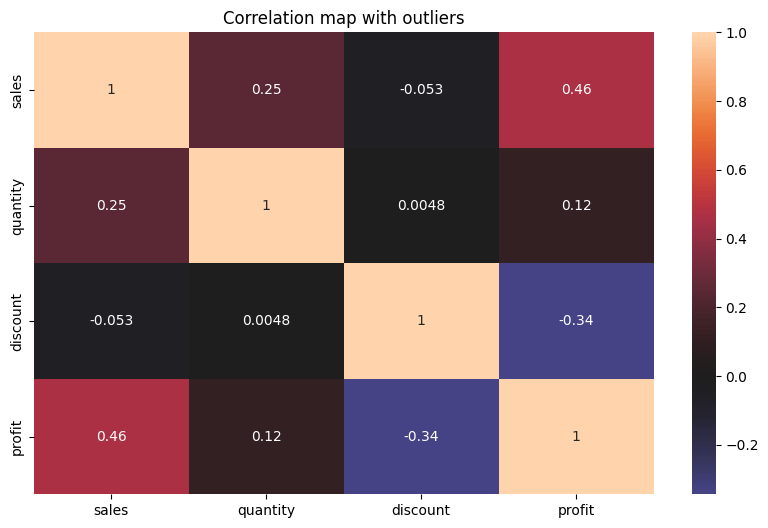

In [1304]:
corrmat= num_df_with_outlier.corr()
plt.figure(figsize=(10,6))  
plt.title("Correlation map with outliers")
sns.heatmap(corrmat,annot=True, center=0)

<Axes: title={'center': 'Correlation map without outliers'}>

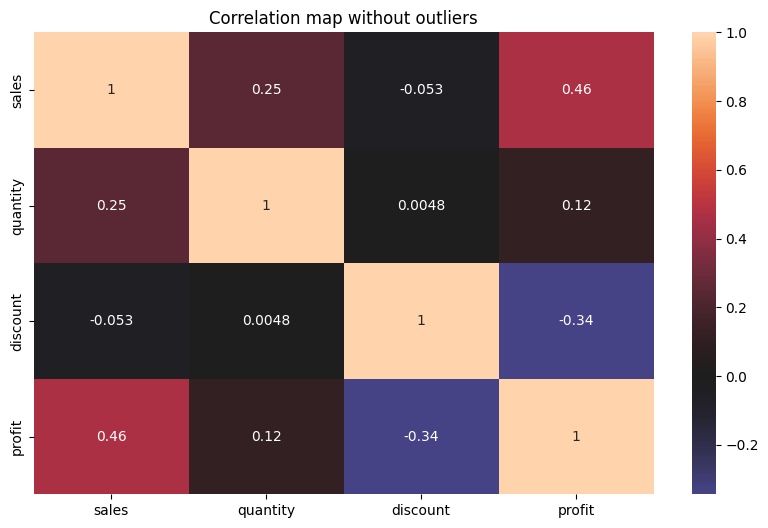

In [1305]:
num_df_without_outlier=num_df_without_outlier.drop(columns="total_revenue")
corrmat= num_df_without_outlier.corr()
plt.figure(figsize=(10,6))  
plt.title("Correlation map without outliers")
sns.heatmap(corrmat,annot=True, center=0)

In [1306]:
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_day'] = df['order_date'].dt.dayofweek
df['ship_year'] = df['order_date'].dt.year
df['ship_month'] = df['order_date'].dt.month
df['ship_day'] = df['order_date'].dt.dayofweek

In [1307]:
data_with_outlier['order_year'] = data_with_outlier['order_date'].dt.year
data_with_outlier['order_month'] = data_with_outlier['order_date'].dt.month
data_with_outlier['order_day'] = data_with_outlier['order_date'].dt.dayofweek
data_with_outlier['ship_year'] = data_with_outlier['order_date'].dt.year
data_with_outlier['ship_month'] = data_with_outlier['order_date'].dt.month
data_with_outlier['ship_day'] = data_with_outlier['order_date'].dt.dayofweek
data_with_outlier['total_revenue'] = data_with_outlier['sales']*data_with_outlier['quantity']

In [1308]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,quantity,discount,profit,total_revenue,order_year,order_month,order_day,ship_year,ship_month,ship_day
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,2,0.00,41.9136,523.9200,2016,11,1,2016,11,1
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,3,0.00,219.5820,2195.8200,2016,11,1,2016,11,1
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,2,0.00,6.8714,29.2400,2016,6,6,2016,6,6
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,5,0.45,-383.0310,4787.8875,2015,10,6,2015,10,6
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,2,0.20,2.5164,44.7360,2015,10,6,2015,10,6


In [1309]:
df.dtypes

order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
total_revenue           float64
order_year                int32
order_month               int32
order_day                 int32
ship_year                 int32
ship_month                int32
ship_day                  int32
dtype: object

Dropping columns like 'order_date','ship_date','customer_id','order_id','product_id','product_name','customer_name', as they do not provide info of segments of customer behaviour or preferences. Id's can introduce unecessary noise and complexity to the clustering process !

In [1310]:
columns_drop =['order_date','ship_date','customer_id','order_id','product_id','product_name','customer_name','city','postal_code','country']
df = df.drop(columns=columns_drop)
data_with_outlier = data_with_outlier.drop(columns=columns_drop)

In [1311]:
df.head()

,ship_mode,segment,state,region,category,sub_category,sales,quantity,discount,profit,total_revenue,order_year,order_month,order_day,ship_year,ship_month,ship_day
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,523.9200,2016,11,1,2016,11,1
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,2195.8200,2016,11,1,2016,11,1
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,29.2400,2016,6,6,2016,6,6
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,4787.8875,2015,10,6,2015,10,6
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,44.7360,2015,10,6,2015,10,6


In [1312]:
Original_cleaned_df = df.copy()

In [1313]:
df['ship_mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [1314]:

df['sub_category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [1315]:
df['segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [1316]:
df['state'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [1317]:
df['region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [1318]:
df['category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [1319]:
df.dtypes

ship_mode         object
segment           object
state             object
region            object
category          object
sub_category      object
sales            float64
quantity           int64
discount         float64
profit           float64
total_revenue    float64
order_year         int32
order_month        int32
order_day          int32
ship_year          int32
ship_month         int32
ship_day           int32
dtype: object

In [1320]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['ship_mode', 'segment', 'state', 'region', 'category', 'sub_category'], dtype='object')

In [1321]:
cat_cols_ = data_with_outlier.select_dtypes(include='object').columns
cat_cols_

Index(['ship_mode', 'segment', 'state', 'region', 'category', 'sub_category'], dtype='object')

In [1322]:
df.shape

(9894, 17)

In [1323]:
data_with_outlier.shape

(9994, 17)

In [1324]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

def transform_(data,cols):
    #encoding the categorical variables using label encoder
    LE = LabelEncoder()
    MM = MinMaxScaler()
    for i in cols:
        data[i] = LE.fit_transform(data[[i]])
    data = pd.DataFrame(MM.fit_transform(data), index=data.index, columns=data.columns)
    return data

df = transform_(df,cat_cols)
data_with_outliers_transformation = transform_(data_with_outlier,cat_cols_)


In [1325]:
df.head()

,ship_mode,segment,state,region,category,sub_category,sales,quantity,discount,profit,total_revenue,order_year,order_month,order_day,ship_year,ship_month,ship_day
0,0.666667,0.0,0.312500,0.666667,0.0,0.2500,0.053239,0.076923,0.0000,0.518321,0.019208,0.666667,0.909091,0.166667,0.666667,0.909091,0.166667
1,0.666667,0.0,0.312500,0.666667,0.0,0.3125,0.148916,0.153846,0.0000,0.595980,0.080556,0.666667,0.909091,0.166667,0.666667,0.909091,0.166667
2,0.666667,0.5,0.062500,1.000000,0.5,0.6250,0.002886,0.076923,0.0000,0.503004,0.001057,0.666667,0.454545,1.000000,0.666667,0.454545,1.000000
3,1.000000,0.0,0.166667,0.666667,0.0,1.0000,0.194850,0.307692,0.5625,0.332575,0.175668,0.333333,0.818182,1.000000,0.333333,0.818182,1.000000
4,1.000000,0.0,0.166667,0.666667,0.5,0.8750,0.004463,0.076923,0.2500,0.501100,0.001625,0.333333,0.818182,1.000000,0.333333,0.818182,1.000000


In [1326]:
df.isna()

,ship_mode,segment,state,region,category,sub_category,sales,quantity,discount,profit,total_revenue,order_year,order_month,order_day,ship_year,ship_month,ship_day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [1327]:
data_with_outliers_transformation.head()

,ship_mode,segment,state,region,category,sub_category,sales,quantity,discount,profit,order_year,order_month,order_day,ship_year,ship_month,ship_day,total_revenue
0,0.666667,0.0,0.312500,0.666667,0.0,0.2500,0.011552,0.076923,0.0000,0.442794,0.666667,0.909091,0.166667,0.666667,0.909091,0.166667,0.003854
1,0.666667,0.0,0.312500,0.666667,0.0,0.3125,0.032313,0.153846,0.0000,0.454639,0.666667,0.909091,0.166667,0.666667,0.909091,0.166667,0.016163
2,0.666667,0.5,0.062500,1.000000,0.5,0.6250,0.000626,0.076923,0.0000,0.440458,0.666667,0.454545,1.000000,0.666667,0.454545,1.000000,0.000212
3,1.000000,0.0,0.166667,0.666667,0.0,1.0000,0.042280,0.307692,0.5625,0.414464,0.333333,0.818182,1.000000,0.333333,0.818182,1.000000,0.035246
4,1.000000,0.0,0.166667,0.666667,0.5,0.8750,0.000968,0.076923,0.2500,0.440168,0.333333,0.818182,1.000000,0.333333,0.818182,1.000000,0.000326


In [1328]:
df.shape

(9894, 17)

In [1329]:
data_with_outliers_transformation.shape

(9994, 17)

______________________________________________________________________________________________________________________________________

# 7. Dimensionality Reduction

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss

Now there are various features in the dataset, however the higher number of features it becomes hard to work with. Also there exist certain correlation between them. Hence, we will perform PCA.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [1330]:
#The entire code is given as an example in their offical documentation
from sklearn.decomposition import PCA

def reduce_dimension(data,n_components):
    data = data.dropna()
    pca = PCA(n_components)
    pca.fit(data)
    PCA_df = pd.DataFrame(pca.transform(data),columns=(['col1','col2','col3','col4']))

    return PCA_df


PCA_with_no_outliers = reduce_dimension(df,4)
PCA_with_outliers = reduce_dimension(data_with_outliers_transformation,4)

In [1331]:
PCA_with_no_outliers.head()

,col1,col2,col3,col4
0,-0.097067,-0.489931,0.384111,0.386893
1,-0.098326,-0.490923,0.388618,0.386926
2,0.374028,0.579270,0.521183,-0.443216
3,-0.133961,0.750084,0.240113,0.206506
4,-0.127937,0.756078,0.288374,0.176229


In [1332]:
PCA_with_outliers.head()

,col1,col2,col3,col4
0,-0.099111,-0.489206,0.382451,0.391751
1,-0.100045,-0.490102,0.385258,0.391568
2,0.378165,0.576029,0.525615,-0.443049
3,-0.133186,0.750902,0.241444,0.205163
4,-0.126926,0.756930,0.291216,0.173936


In [1333]:
PCA_with_no_outliers.shape

(9894, 4)

In [1334]:
PCA_with_outliers.shape

(9994, 4)

Let's plot and look at the reduced dimension. We will take help of 3D plot as we have 3 columns.

In [1335]:
#x =PCA_df["col1"]
#y =PCA_df["col2"]
#z =PCA_df["col3"]

#To plot
#fig = plt.figure(figsize=(10,8))
#ax = fig.add_subplot(111, projection="3d")
#ax.scatter(x,y,z, c="maroon", marker="o" )
#ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
#plt.show()

________________________________________________________________________________________________________________________________________________

# 8. Clustering

We will follow the official documentation of sklearn to perform clustering :

https://scikit-learn.org/stable/modules/clustering.html

____________________________________________________________________________________________________________________________________________

# 8.1 Centroid/ Partition Based Clustering Algorithm



So, before initiating our clustering section. After research it was found out that dataset having categorical variables could not be clustered using Kmeans. 

However, the categorical features can still be encoded using One-hot encoding and other encoding techniques and we can still run KMeans.

But, the problem isn't solved yet. The main issue is, even if you encode your categorical variables and then train your model and if your features in dataset increases. Due to the curse of dimensionality, there are high chances of incorrect clustering and potential performance issues.



We will make use of Elbow method initially to get the ideal number of clusters.

In [1336]:
cluster_df = pd.DataFrame()

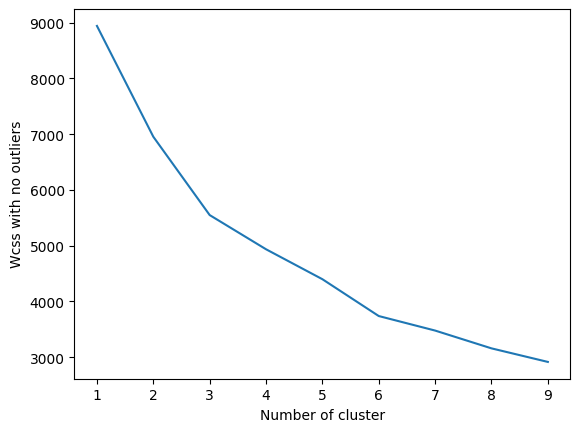

In [1337]:
from sklearn.cluster import KMeans


wcss ={}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,max_iter=300,random_state=42).fit(PCA_with_no_outliers)
    wcss[k] = kmeans.inertia_

plt.figure()
plt.plot(list(wcss.keys()), list(wcss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Wcss with no outliers")
plt.show()


Findings : Number of clusters as per elbow method for data with no outliers

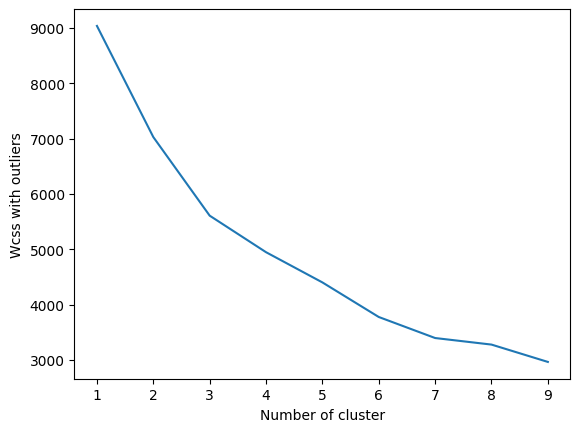

In [1338]:
from sklearn.cluster import KMeans


wcss ={}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,max_iter=300,random_state=42).fit(PCA_with_outliers)
    wcss[k] = kmeans.inertia_

plt.figure()
plt.plot(list(wcss.keys()), list(wcss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Wcss with outliers")
plt.show()


Findings : Number of clusters as per elbow method = 7

8.1.1 K-Means

In [1339]:
import time
def Kmeans_(data,k,random_state):
    start_time = time.time()
    kmeans = KMeans(n_clusters=k, random_state = random_state, n_init="auto").fit(data)
    end_time = time.time()
    
    Kmeans_Execution_Time = end_time - start_time
    return [kmeans.labels_,Kmeans_Execution_Time]


In [1340]:
Kmeans_no_outliers,Kmeans_Execution_Time_no_outliers = Kmeans_(PCA_with_no_outliers,6,0)
Kmeans_outliers,Kmeans_Execution_Time_outliers = Kmeans_(PCA_with_outliers,7,0)

Let's visualize the distribution of clusters:

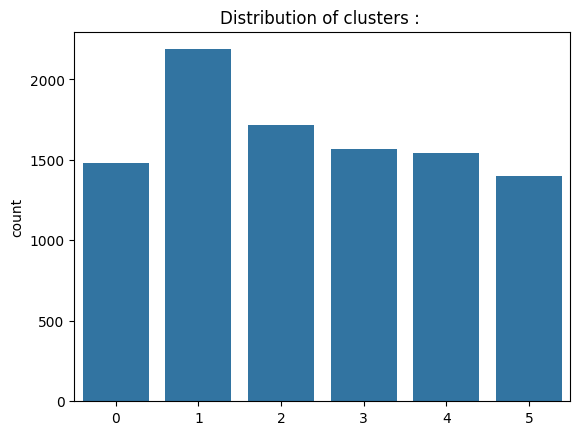

In [1341]:
sns.countplot(x=Kmeans_no_outliers)
plt.title('Distribution of clusters : ')
plt.show()

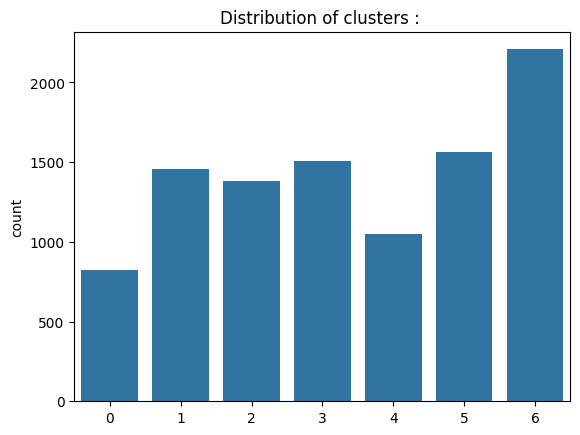

In [1342]:
sns.countplot(x=Kmeans_outliers)
plt.title('Distribution of clusters : ')
plt.show()

In [1343]:
#sns.scatterplot(x=df['sales'],y=df['profit'], hue=df['clusters'])
#plt.title("profit and sales in relation with clusters")
#plt.show()

_____________________________________________________________________________________________________________________________________________

# 8.2 Hierarchical Clustering 

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). 

8.2.1 Agglomerative Clustering : Each observation starts in its own cluster, and clusters are successively merged together. The linkage critera determines the metric used for the merge strategy :

Ward : minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to kmeans objective function but tackled with an agglomerative approach.

Maximum or complete linkage : minimizes the maximum distance between observations of pairs of clusters.

Average linkage : minimizes the average of the distance between all observations of pair of clusters.

Single Linkage: minimizes the distance between the closest observations of pair of clusters.

https://towardsdatascience.com/hierarchical-clustering-explained-e59b13846da8


https://medium.com/@khalidassalafy/agglomerative-hierarchical-clustering-a-study-and-implementation-in-python-fddfdb6a7a64

In [1344]:
from sklearn .cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

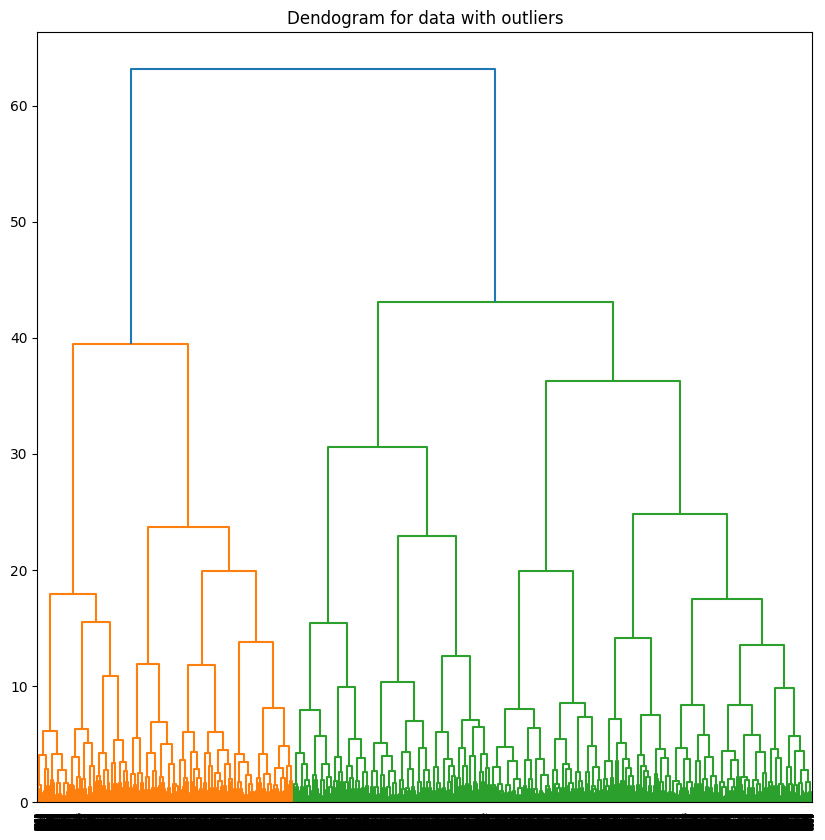

In [1345]:
plt.figure(figsize=(10,10))
plt.title('Dendogram for data with outliers')
dend_ward = hierarchy.dendrogram(hierarchy.linkage(PCA_with_outliers,method='ward'))


 the number of cluster are 2.

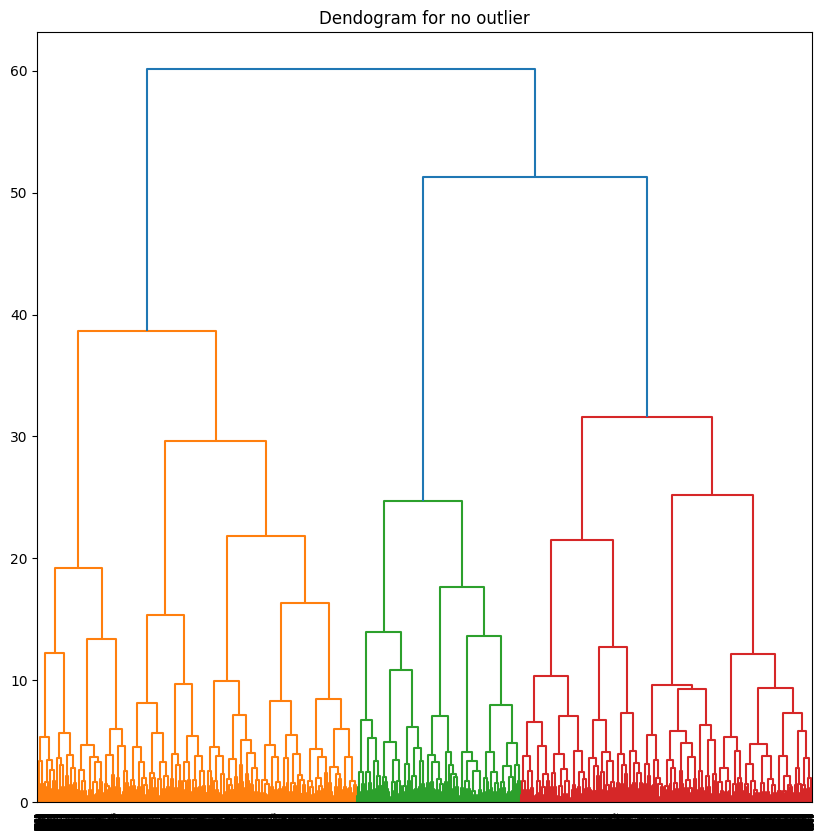

In [1346]:
plt.figure(figsize=(10,10))
plt.title('Dendogram for no outlier')
dend_ward = hierarchy.dendrogram(hierarchy.linkage(PCA_with_no_outliers,method='ward'))


 the number of cluster are 2.

Now, you need to find longest vertical line that has no horizontal line passing through it. the vertical lines defines the intercluster similarity.

https://stackoverflow.com/questions/77994935/why-am-i-getting-this-typeerror-agglomerativeclustering-init-got-an-unexp

In [1347]:
def AC(data,n_cluster):
    start_time = time.time()
    cluster = AgglomerativeClustering(n_clusters=n_cluster,metric='euclidean',linkage='ward')
    labels_AC = cluster.fit_predict(data)
    end_time = time.time()
    HAC_Execution_Time = end_time - start_time
    return labels_AC,HAC_Execution_Time

outlier_label_AC , HAC_Execution_Time_outlier = AC(PCA_with_outliers,2)
no_outlier_label_AC , HAC_Execution_Time_no_outlier = AC(PCA_with_no_outliers,2)

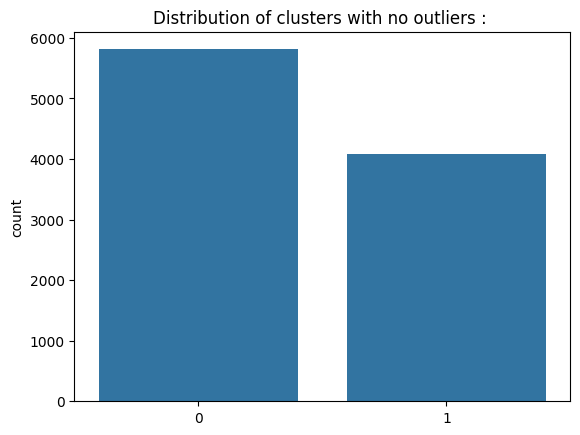

In [1348]:
sns.countplot(x=no_outlier_label_AC)
plt.title('Distribution of clusters with no outliers : ')
plt.show()

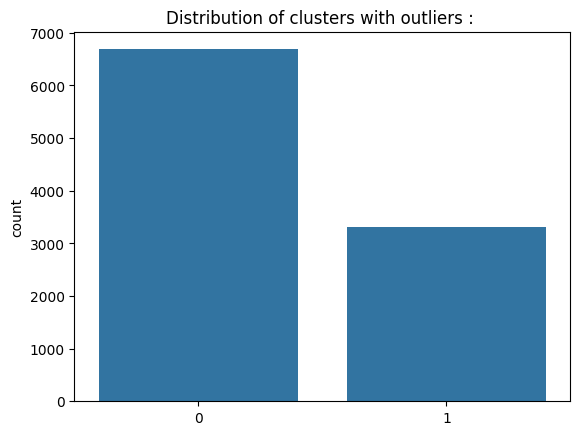

In [1349]:
sns.countplot(x=outlier_label_AC)
plt.title('Distribution of clusters with outliers : ')
plt.show()

______________________________________________________________________________________________________________

# 8.3 Density based Clustering :

8.3\.1 DBSCAN :

The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. 

https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

In [1350]:
from sklearn.cluster import DBSCAN

def DB(data):
    start_time = time.time()
    db =DBSCAN(eps=0.2,min_samples=5).fit(data)
    labels =db.labels_
    end_time = time.time()

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    DBSCAN_Execution_Time = end_time-start_time

    return db.labels_,DBSCAN_Execution_Time,n_clusters_,n_noise_

outlier_label_DB,DBSCAN_Execution_Time_outlier,no_of_clusters_outlier, no_of_noise_outlier = DB(PCA_with_outliers)
no_outlier_label_DB,DBSCAN_Execution_Time_no_outlier,no_of_clusters_no_outlier, no_of_noise_no_outlier = DB(PCA_with_no_outliers)

print("Estimated number of clusters  for data with outliers: %d" % no_of_clusters_outlier)
print("Estimated number of noise points for data with outliers: %d" % no_of_noise_outlier)

print("________________________________________________________________________________")

print("Estimated number of clusters  for data without outliers: %d" % no_of_clusters_no_outlier)
print("Estimated number of noise points for data without outliers: %d" % no_of_noise_no_outlier)


Estimated number of clusters  for data with outliers: 29
Estimated number of noise points for data with outliers: 88
________________________________________________________________________________
Estimated number of clusters  for data without outliers: 28
Estimated number of noise points for data without outliers: 97


It is seen that there is a lot of outlier in the dataset that means it has noise point : 276

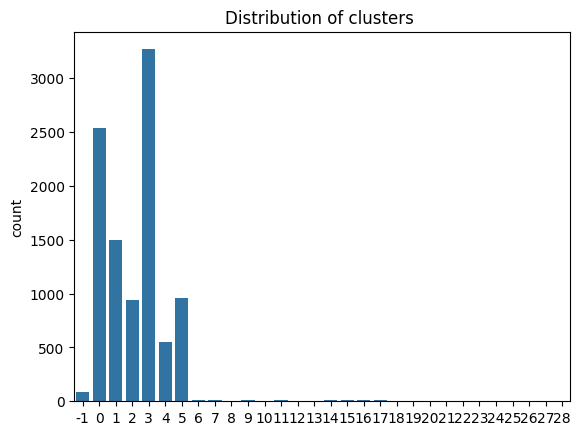

In [1351]:
sns.countplot(x=outlier_label_DB)
plt.title(f'Distribution of clusters ')
plt.show()

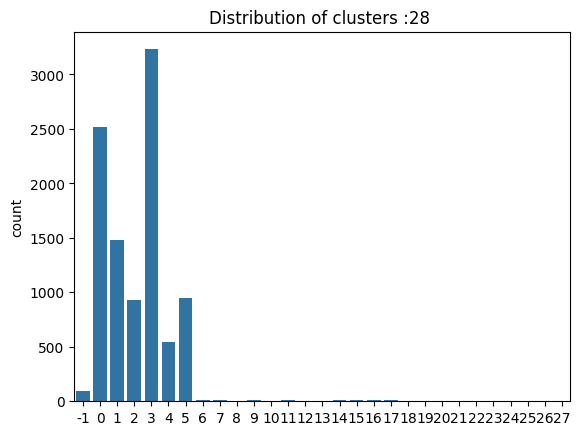

In [1352]:
sns.countplot(x=no_outlier_label_DB)
plt.title(f'Distribution of clusters :{no_of_clusters_no_outlier} ')
plt.show()

____________________________________________

# 9. Evaluation Metrics

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall of a supervised classification algorithm. In particular any evaluation metric should not take the absolute values of the cluster labels into account but rather if this clustering define separations of the data similar to some ground truth set of classes or satisfying some assumption such that members belong to the same class are more similar than members of different classes according to some similarity metric.

- - - - -  - - - - - - - 

9.1 Silhouete Coefficient : 

Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. 

We will evaluate all the clustering algo using this metric.

Note : The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [1353]:
from sklearn.metrics import silhouette_score
print(f'Silhouete Score for Kmeans : {silhouette_score(PCA_with_no_outliers,Kmeans_no_outliers,metric='euclidean')}')
print(f'Silhouete Score for Agglomerative : {silhouette_score(PCA_with_no_outliers,no_outlier_label_AC,metric='euclidean')}')
print(f'Silhouete Score for DBscan : {silhouette_score(PCA_with_no_outliers,no_outlier_label_DB,metric='euclidean')}')

print("__________________________________________________________________________________________")


print(f'Silhouete Score for Kmeans outliers : {silhouette_score(PCA_with_outliers,Kmeans_outliers,metric='euclidean')}')
print(f'Silhouete Score for Agglomerative outliers: {silhouette_score(PCA_with_outliers,outlier_label_AC,metric='euclidean')}')
print(f'Silhouete Score for DBscan outliers : {silhouette_score(PCA_with_outliers,outlier_label_DB,metric='euclidean')}')

Silhouete Score for Kmeans : 0.23761563680017225
Silhouete Score for Agglomerative : 0.19215197148292187
Silhouete Score for DBscan : -0.2835974386500626
__________________________________________________________________________________________
Silhouete Score for Kmeans outliers : 0.23494028851018464
Silhouete Score for Agglomerative outliers: 0.23705398330224953
Silhouete Score for DBscan outliers : -0.29352600640491144


____________________

9.2  Calinski-Harabasz Index

Note : The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

In [1354]:
from sklearn.metrics import calinski_harabasz_score
print(f'calinski_harabasz_score Score for Kmeans : {calinski_harabasz_score(PCA_with_no_outliers,Kmeans_no_outliers)}')
print(f'calinski_harabasz_score Score for Agglomerative : {calinski_harabasz_score(PCA_with_no_outliers,no_outlier_label_AC)}')
print(f'calinski_harabasz_score Score for DBScan : {calinski_harabasz_score(PCA_with_no_outliers,no_outlier_label_DB)}')

print("__________________________________________________________________________________________")


print(f'calinski_harabasz_score Score for Kmeans  outliers: {calinski_harabasz_score(PCA_with_outliers,Kmeans_outliers)}')
print(f'calinski_harabasz_score Score for Agglomerative outliers: {calinski_harabasz_score(PCA_with_outliers,outlier_label_AC)}')
print(f'calinski_harabasz_score Score for DBScan outliers: {calinski_harabasz_score(PCA_with_outliers,outlier_label_DB)}')

calinski_harabasz_score Score for Kmeans : 2762.7281789809017
calinski_harabasz_score Score for Agglomerative : 2507.4438731564614
calinski_harabasz_score Score for DBScan : 253.8875294074945
__________________________________________________________________________________________
calinski_harabasz_score Score for Kmeans  outliers: 2595.3753300800736
calinski_harabasz_score Score for Agglomerative outliers: 2830.361149573934
calinski_harabasz_score Score for DBScan outliers: 248.74056489529565


_____________________________________________

9.3 Davies-Bouldin Index

(sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

Note  : Zero is the lowest possible score. Values closer to zero indicate a better partition.

In [1355]:
from sklearn.metrics import davies_bouldin_score
print(f'davies_bouldin_score Score for Kmeans : {davies_bouldin_score(PCA_with_no_outliers,Kmeans_no_outliers)}')
print(f'davies_bouldin_score Score for Agglomerative : {davies_bouldin_score(PCA_with_no_outliers,no_outlier_label_AC)}')
print(f'davies_bouldin_score Score for DBScan : {davies_bouldin_score(PCA_with_no_outliers,no_outlier_label_DB)}')


print("__________________________________________________________________________________________")


print(f'davies_bouldin_score Score for Kmeans Outliers : {davies_bouldin_score(PCA_with_outliers,Kmeans_outliers)}')
print(f'davies_bouldin_score Score for Agglomerative Outliers : {davies_bouldin_score(PCA_with_outliers,outlier_label_AC)}')
print(f'davies_bouldin_score Score for DBScan Outliers : {davies_bouldin_score(PCA_with_outliers,outlier_label_DB)}')


davies_bouldin_score Score for Kmeans : 1.2671817711424882
davies_bouldin_score Score for Agglomerative : 1.8821212607232998
davies_bouldin_score Score for DBScan : 1.4364059192280203
__________________________________________________________________________________________
davies_bouldin_score Score for Kmeans Outliers : 1.3113588625681327
davies_bouldin_score Score for Agglomerative Outliers : 1.7112260773429815
davies_bouldin_score Score for DBScan Outliers : 1.4287837388859113


___________

9.4 Execution time in seconds:

In [1356]:
print(f'Execution_Time  for  Kmeans : {Kmeans_Execution_Time_no_outliers}')
print(f'Execution_Time  for Agglomerative : {HAC_Execution_Time_outlier}')
print(f'Execution_Time  for DBScan : {DBSCAN_Execution_Time_outlier}')

print("__________________________________________________________________________________________")

print(f'Execution_Time  for  Kmeans  Outliers: {Kmeans_Execution_Time_outliers}')
print(f'Execution_Time  for Agglomerative  Outliers: {HAC_Execution_Time_no_outlier}')
print(f'Execution_Time  for DBScan  Outliers: {DBSCAN_Execution_Time_no_outlier}')

Execution_Time  for  Kmeans : 0.013000726699829102
Execution_Time  for Agglomerative : 2.0573837757110596
Execution_Time  for DBScan : 0.13499021530151367
__________________________________________________________________________________________
Execution_Time  for  Kmeans  Outliers: 0.013000249862670898
Execution_Time  for Agglomerative  Outliers: 1.9063317775726318
Execution_Time  for DBScan  Outliers: 0.1262836456298828


So as of insights, it is seen that Kmeans with and without outliers are better performing. However, among themselves data having outliers modelled using kmeans is better. 

____

# 10. Fine tuning clustering models

Fine tuning models with data having no outliers

10.1 K-Means

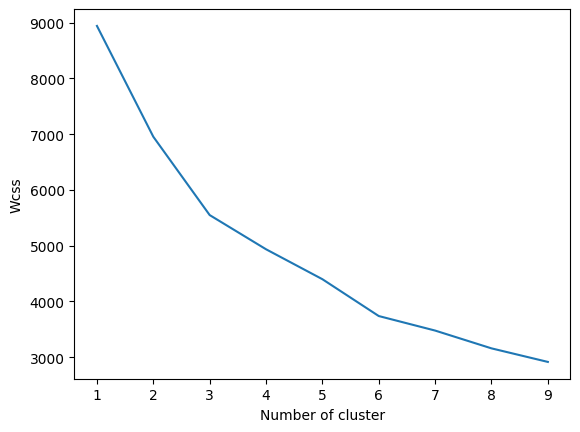

In [1357]:
# Before Fine tuning Kmeans, lets plot elbow graph
wcss ={}
for k in range(1,10):
    ft_kmeans = KMeans(n_clusters=k,max_iter=500,random_state=42).fit(PCA_with_no_outliers) #setting max iteration to 500 
    wcss[k] = ft_kmeans.inertia_

plt.figure()
plt.plot(list(wcss.keys()), list(wcss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Wcss")
plt.show()

In [1358]:
import time 
k=6
start_time = time.time()
ft_kmeans_ = KMeans(n_clusters=k,random_state=42, n_init="auto").fit(PCA_with_no_outliers)
end_time = time.time()
cluster_df['Kmeans_clusters'] = ft_kmeans_.labels_
ft_Kmeans_Execution_Time = end_time - start_time


10.2 Agglomerative

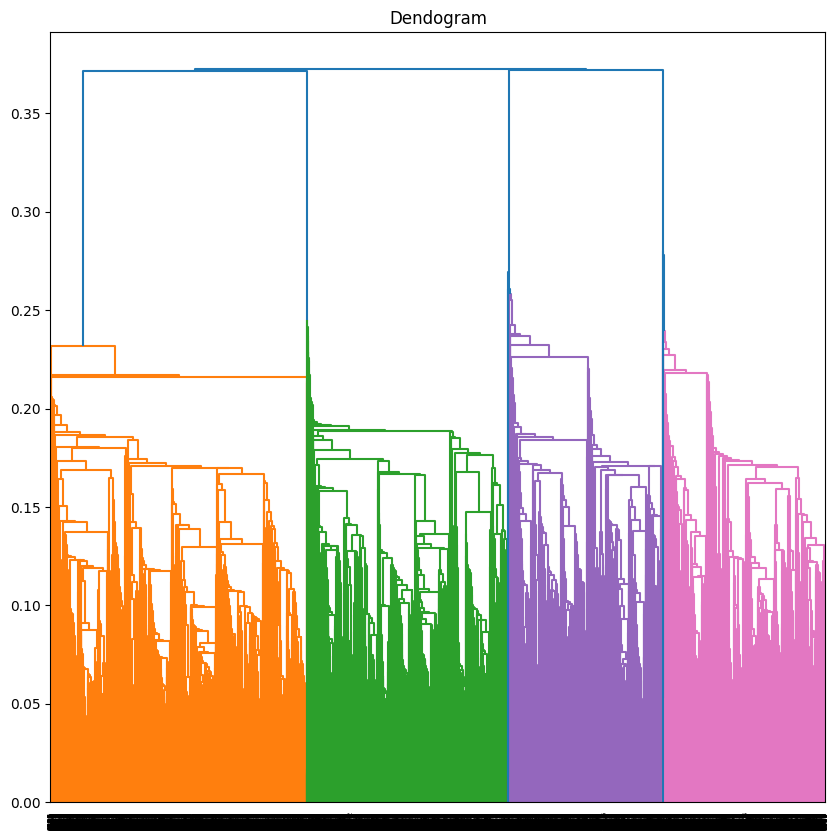

In [1359]:
plt.figure(figsize=(10,10))
plt.title('Dendogram')
dend_ward = hierarchy.dendrogram(hierarchy.linkage(PCA_with_no_outliers,method='single'))

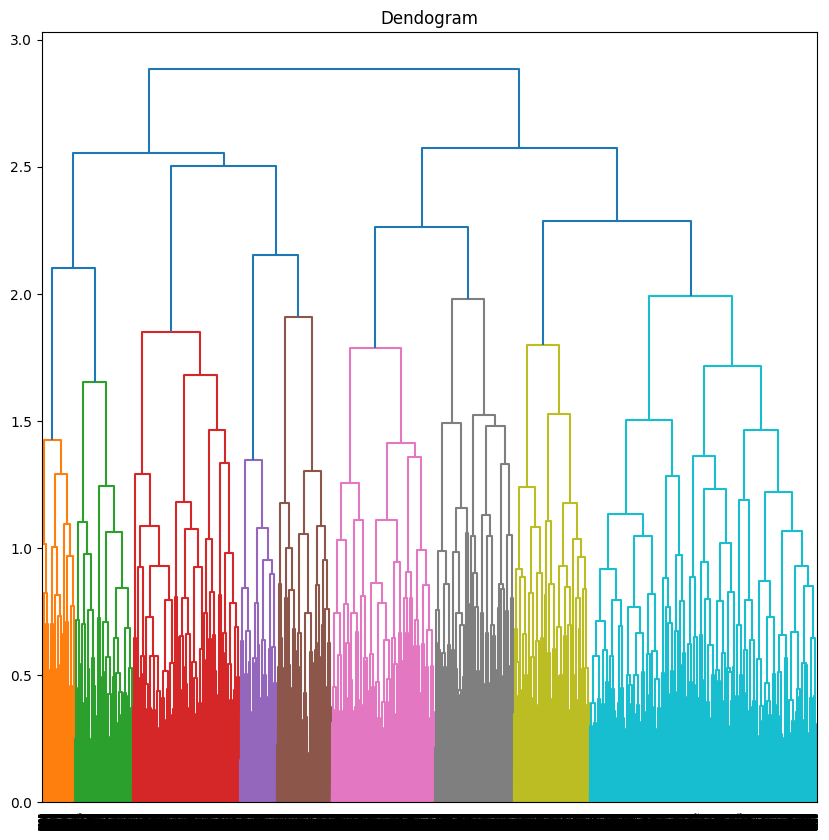

In [1360]:
plt.figure(figsize=(10,10))
plt.title('Dendogram')
dend_ward = hierarchy.dendrogram(hierarchy.linkage(PCA_with_no_outliers,method='complete'))

In [1361]:
start_time = time.time()
ft_single_cluster = AgglomerativeClustering(n_clusters=2,metric='manhattan',linkage='single')
ft_single_labels_AC = ft_single_cluster.fit_predict(PCA_with_no_outliers)
end_time = time.time()
ft_single_HAC_Execution_Time = end_time - start_time

In [1362]:
start_time = time.time()
ft_complete_cluster = AgglomerativeClustering(n_clusters=2,metric='manhattan',linkage='complete')
ft_complete_labels_AC = ft_complete_cluster.fit_predict(PCA_with_no_outliers)
end_time = time.time()
ft_complete_HAC_Execution_Time = end_time - start_time

10.3 DB Scan


In [1363]:
from sklearn.cluster import DBSCAN

start_time = time.time()
ft_db =DBSCAN(eps=0.2,min_samples=10).fit(PCA_with_no_outliers)
labels =ft_db.labels_
end_time = time.time()

print(np.unique(ft_db.labels_))

cluster_df['DB_cluster'] = ft_db.labels_
# The below code has been reffered from sklearns official site
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
ft_DBSCAN_Execution_Time = end_time-start_time

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Estimated number of clusters: 15
Estimated number of noise points: 342


________________________

# 11.  Evaluating Fine tuned Models :

In [1364]:
# Silhouette Coefficient
from sklearn.metrics import silhouette_score
print(f'Silhouete Score for Kmeans : {silhouette_score(PCA_with_no_outliers,ft_kmeans.labels_,metric='euclidean')}')
print(f'Silhouete Score for single Agglomerative : {silhouette_score(PCA_with_no_outliers,ft_single_labels_AC,metric='manhattan')}')
print(f'Silhouete Score for complete Agglomerative : {silhouette_score(PCA_with_no_outliers,ft_complete_labels_AC,metric='manhattan')}')
print(f'Silhouete Score for DBscan : {silhouette_score(PCA_with_no_outliers,ft_db.labels_,metric='euclidean')}')


Silhouete Score for Kmeans : 0.24917672205606664
Silhouete Score for single Agglomerative : 0.2496753844903895
Silhouete Score for complete Agglomerative : 0.22439154202687123
Silhouete Score for DBscan : -0.1394168164906616


In [1365]:
# Calinski-Harabasz Index
from sklearn.metrics import calinski_harabasz_score
print(f'calinski_harabasz Score for Kmeans : {calinski_harabasz_score(PCA_with_no_outliers,ft_kmeans.labels_)}')
print(f'calinski_harabasz Score for single Agglomerative : {calinski_harabasz_score(PCA_with_no_outliers,ft_single_labels_AC)}')
print(f'calinski_harabasz Score for complete Agglomerative : {calinski_harabasz_score(PCA_with_no_outliers,ft_complete_labels_AC)}')
print(f'calinski_harabasz Score for DBscan : {calinski_harabasz_score(PCA_with_no_outliers,ft_db.labels_)}')

calinski_harabasz Score for Kmeans : 2554.2666079275295
calinski_harabasz Score for single Agglomerative : 3293.1721967772432
calinski_harabasz Score for complete Agglomerative : 2611.1460565303623
calinski_harabasz Score for DBscan : 561.5903982661221


In [1366]:
#davies_bouldin_score

from sklearn.metrics import davies_bouldin_score
print(f'davies_bouldin Score for Kmeans : {davies_bouldin_score(PCA_with_no_outliers,ft_kmeans.labels_)}')
print(f'davies_bouldin Score for single  Agglomerative : {davies_bouldin_score(PCA_with_no_outliers,ft_single_labels_AC)}')
print(f'davies_bouldin Score for complete Agglomerative : {davies_bouldin_score(PCA_with_no_outliers,ft_complete_labels_AC)}')
print(f'davies_bouldin Score for DBscan : {davies_bouldin_score(PCA_with_no_outliers,ft_db.labels_)}')

davies_bouldin Score for Kmeans : 1.244226930800748
davies_bouldin Score for single  Agglomerative : 1.6473033217277482
davies_bouldin Score for complete Agglomerative : 1.8058613564779893
davies_bouldin Score for DBscan : 1.9362408341118709


In [1367]:
print(f'Execution_Time  for  Kmeans : {ft_Kmeans_Execution_Time}')
print(f'Execution_Time  for  single ward Agglomerative : {ft_single_HAC_Execution_Time}')
print(f'Execution_Time  for  complete ward Agglomerative : {ft_complete_HAC_Execution_Time}')
print(f'Execution_Time  for DBScan : {ft_DBSCAN_Execution_Time}')

Execution_Time  for  Kmeans : 0.021599531173706055
Execution_Time  for  single ward Agglomerative : 0.3227543830871582
Execution_Time  for  complete ward Agglomerative : 2.0303890705108643
Execution_Time  for DBScan : 0.15930938720703125


_____________________________________________________________________________________________

# 12. Conclusion : 

It is seen that after outlier removal, standard scaling, label encoding and Principal component analysis, Kmeans performance has been better without fine tuning. 


Therefore, I am considering finetuned Kmeans clustering algo for customer segmentation.

 Lets save df to database 

In [1368]:
data_['cluster'] = ft_kmeans_.labels_


In [1369]:
data_['cluster'].unique()

array([1, 4, 3, 5, 0, 2], dtype=int32)

In [1370]:
s = kmeans.labels_
s.max()

np.int32(8)

In [1371]:
data_.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,cluster
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,1
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,3


In [1372]:
# code for generating latitude and longitude
 
#self
cities = data_['city'].unique()
cities

#https://geopy.readthedocs.io/en/latest/
from geopy.geocoders import Nominatim
cordinates = {}
geolocator = Nominatim(user_agent="Zigsaw")

for city in cities:
    location = geolocator.geocode(city + ", USA")
    if location:
        cordinates[city] = {"latitude":location.latitude,"longitude":location.longitude}
    else:
        print(f"Could not find location for {city}")

data_['latitude'] = None
data_['longitude'] = None

for index, row in data_.iterrows():
    city_ = row['city']
    if city_ in cordinates:
        data_.loc[index,'latitude'] = cordinates[city_]['latitude']
        data_.loc[index,'longitude'] = cordinates[city_]['longitude']
 

In [1373]:
data_.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,category,sub_category,product_name,sales,quantity,discount,profit,cluster,latitude,longitude
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,1,32.182598,-95.789318
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1,32.182598,-95.789318
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,34.053691,-118.242766
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3,26.122308,-80.143379
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,3,26.122308,-80.143379


In [1374]:
table_name = 'Main_Kmeans_clusters'
save_to_sqlite(data_, table_name)

In [1375]:
import pandas as pd
import os

data_dir = "C:\\FinalYearProject\\code\\code\\data\\rawData"
os.makedirs(data_dir, exist_ok=True)

data_.to_csv(os.path.join(data_dir, "clustered.csv"), index=False, encoding='utf-8')


_____________________________________